# Лабораторная работа 3 : Деревья решений. Ансамбли решающих деревьев

In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import xgboost as xgb


## Задание 1

In [3]:
# V = 83 => вариант 6

df = pd.read_csv('train.csv')
df['Cover_Type'] -= 1
df


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,4
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,4
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,1
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,1
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,15116,2607,243,23,258,7,660,170,251,214,...,0,0,0,0,0,0,0,0,0,2
15116,15117,2603,121,19,633,195,618,249,221,91,...,0,0,0,0,0,0,0,0,0,2
15117,15118,2492,134,25,365,117,335,250,220,83,...,0,0,0,0,0,0,0,0,0,2
15118,15119,2487,167,28,218,101,242,229,237,119,...,0,0,0,0,0,0,0,0,0,2


In [4]:
res = {
    0: 'Spruce/Fir',
    1: 'Lodgepole Pine',
    2: 'Ponderosa Pine',
    3: 'Cottonwood/Willow',
    4: 'Aspen',
    5: 'Douglas-fir',
    6: 'Krummholz'
}


In [5]:
print('статистики')
df.describe()


статистики


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,3.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


In [6]:
print('пропущенных значений', df.apply(lambda x: sum(x.isnull()), axis=0).sum())


пропущенных значений 0


In [7]:
X = df.dropna().reset_index().drop('Cover_Type', axis=1)
y = df.dropna().reset_index()['Cover_Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2022)


## Задание 2

In [72]:
decision_tree = DecisionTreeClassifier(max_depth=3)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)


[Text(0.5, 0.875, 'Aspect <= 2672.5\ngini = 0.857\nsamples = 10584\nvalue = [1534, 1528, 1469, 1537, 1504, 1495, 1517]\nclass = Cottonwood/Willow'),
 Text(0.25, 0.625, 'Aspect <= 2377.5\ngini = 0.708\nsamples = 4564\nvalue = [8, 160, 1358, 1537, 148, 1353, 0]\nclass = Cottonwood/Willow'),
 Text(0.125, 0.375, 'Hillshade_Noon <= 194.5\ngini = 0.596\nsamples = 2678\nvalue = [0, 3, 658, 1472, 0, 545, 0]\nclass = Cottonwood/Willow'),
 Text(0.0625, 0.125, 'gini = 0.635\nsamples = 884\nvalue = [0, 2, 380, 164, 0, 338, 0]\nclass = Ponderosa Pine'),
 Text(0.1875, 0.125, 'gini = 0.431\nsamples = 1794\nvalue = [0, 1, 278, 1308, 0, 207, 0]\nclass = Cottonwood/Willow'),
 Text(0.375, 0.375, 'Soil_Type11 <= 0.5\ngini = 0.664\nsamples = 1886\nvalue = [8, 157, 700, 65, 148, 808, 0]\nclass = Douglas-fir'),
 Text(0.3125, 0.125, 'gini = 0.695\nsamples = 1306\nvalue = [5, 137, 577, 63, 145, 379, 0]\nclass = Ponderosa Pine'),
 Text(0.4375, 0.125, 'gini = 0.407\nsamples = 580\nvalue = [3, 20, 123, 2, 3, 429,

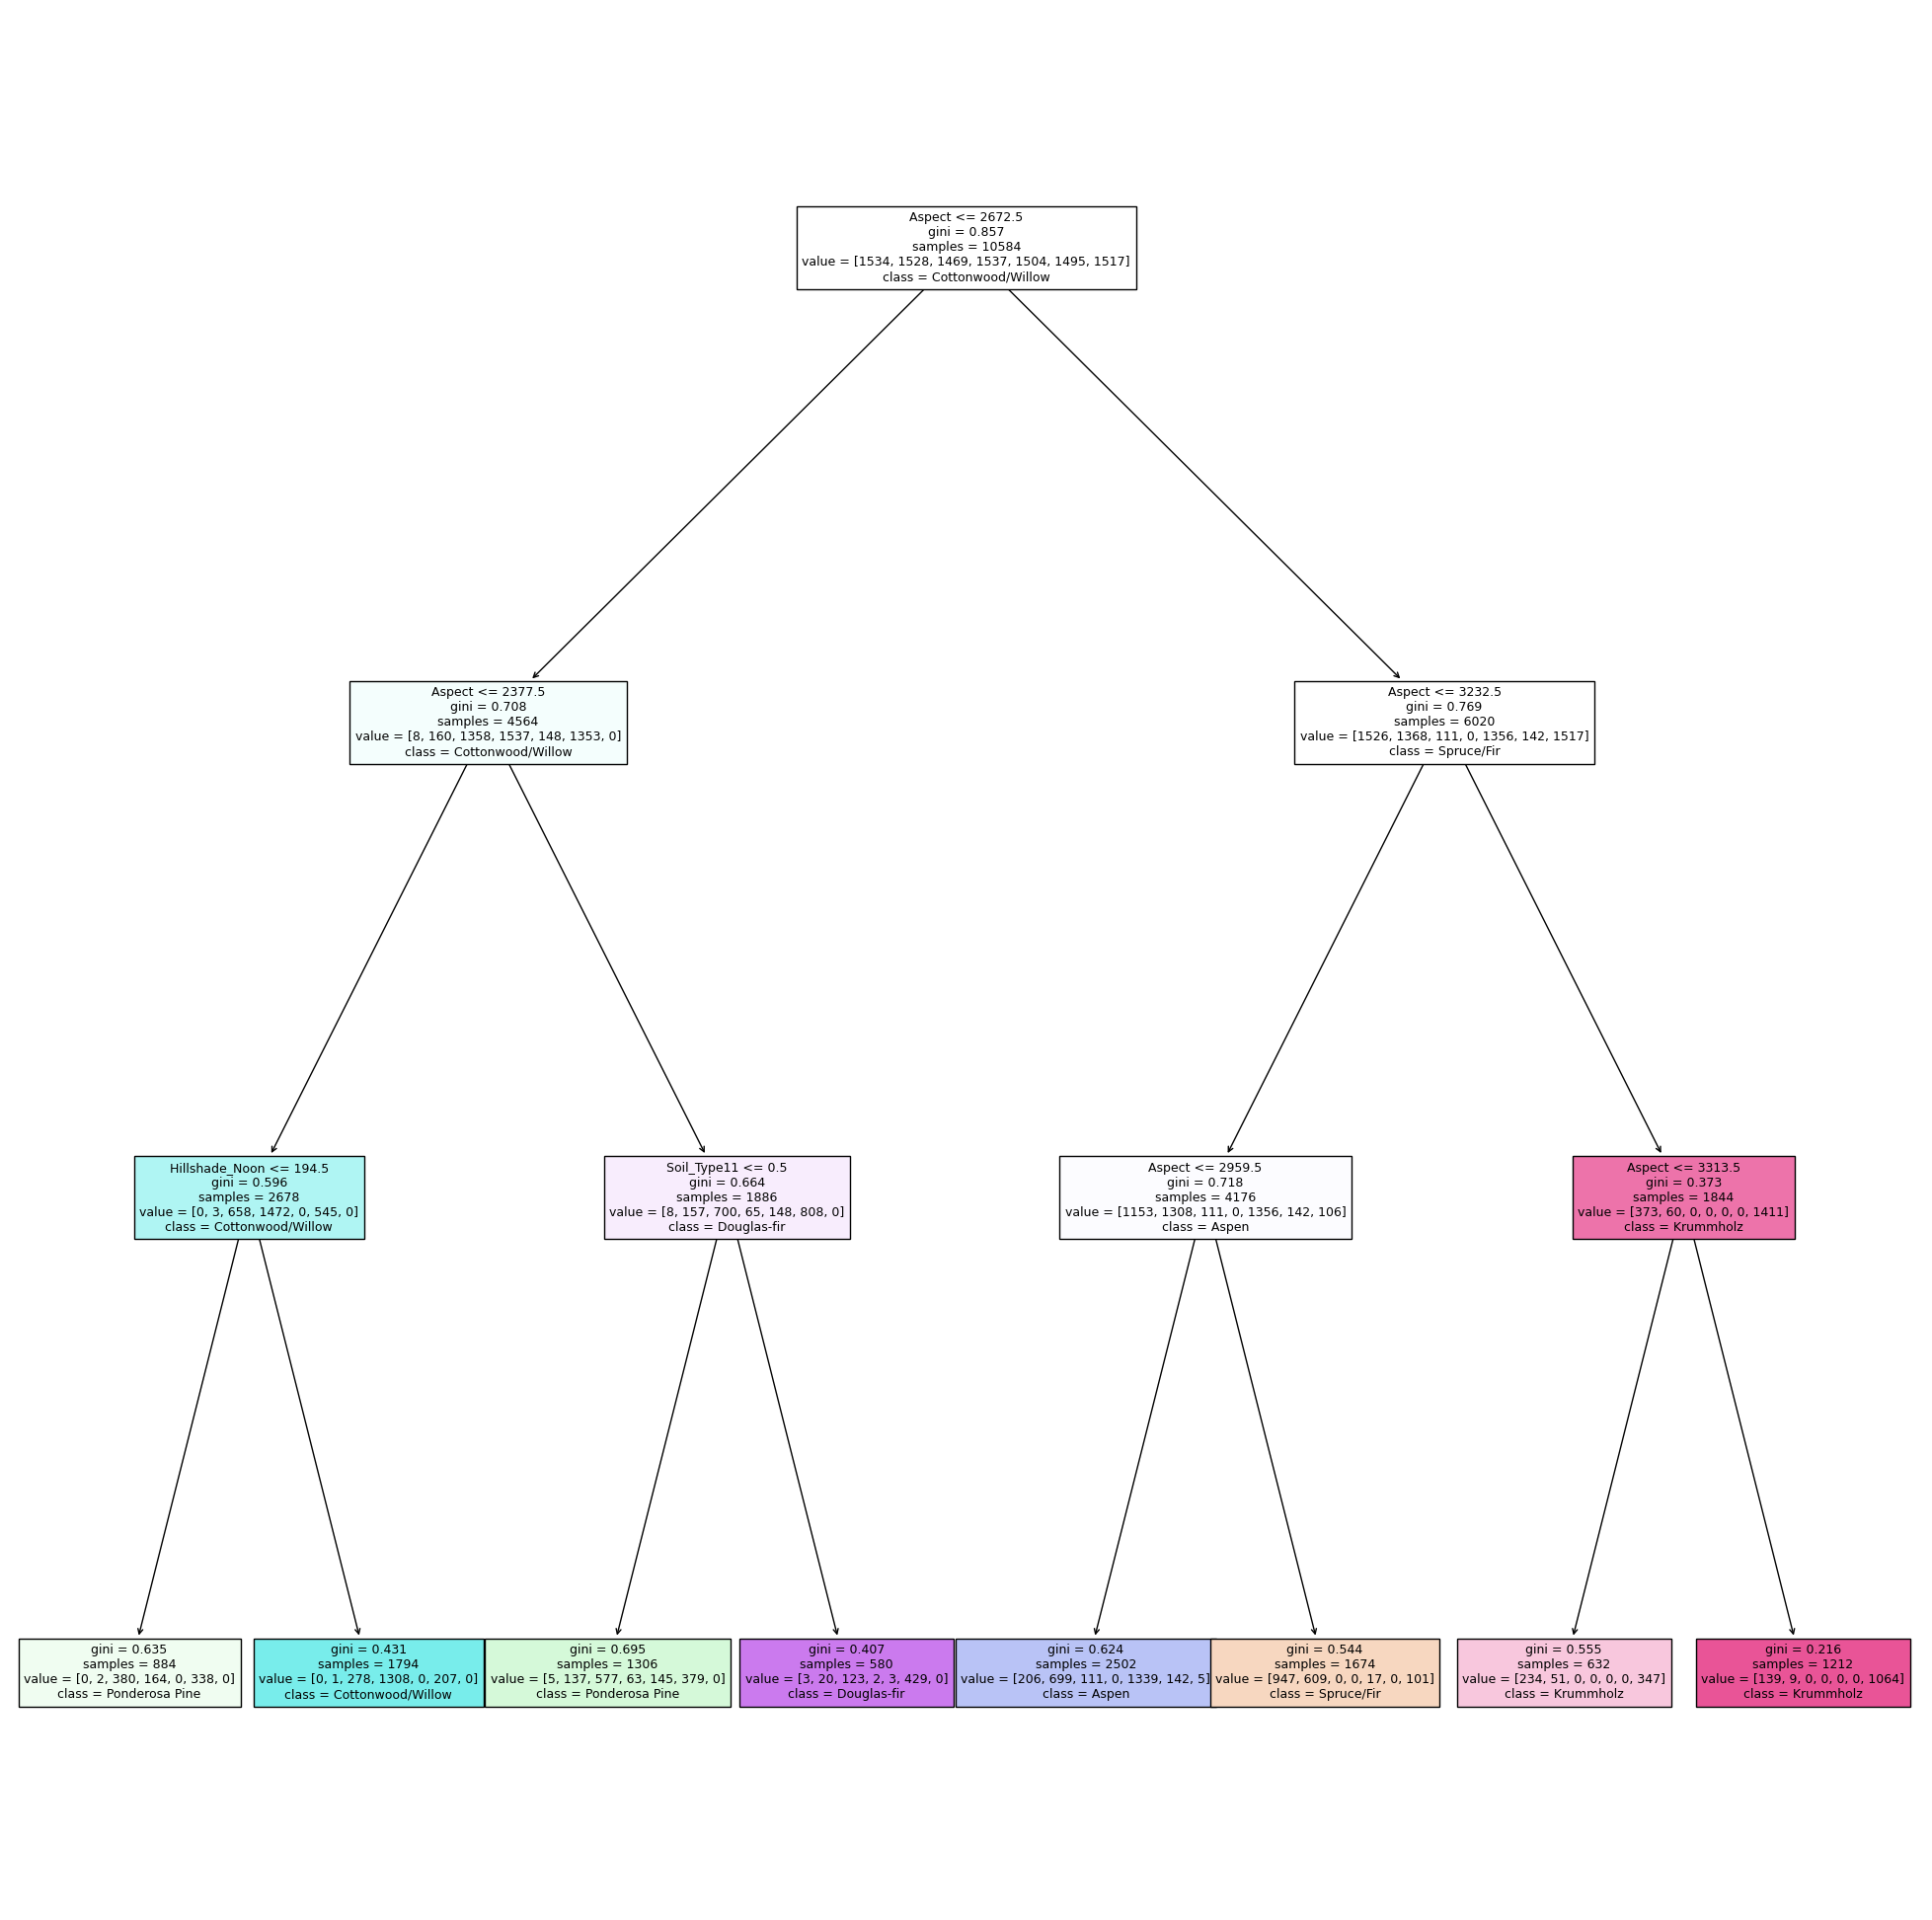

In [73]:
plt.figure(figsize=(25, 25))
plot_tree(decision_tree, feature_names=df.drop("Cover_Type", axis=1).columns, fontsize=9, class_names=list(res.values()), filled=True)


Если Aspect не больше 2377.5 и Hillshade_Noon не больше 194.5, то это Ponderosa Pine.

Если Aspect не больше 2377.5 и Hillshade_Noon больше 194.5, то это Cottonwood/Willow.

Если Aspect больше 2377.5, но меньше 2672.5 и Soil_Type11 не больше 0.5, то это Ponderosa Pine.

Если Aspect больше 2377.5, но меньше 2672.5 и Soil_Type11 больше 0.5, то это Douglas-fir.

Если Aspect больше 2672.5, но не больше 2959.5, то это Aspen.

Если Aspect больше 2959.5, но не больше 3232.5, то это Spruce/Fir.

Если Aspect больше 3232.5, то это Krummholz.

In [74]:
print('точность', accuracy_score(y_pred, y_test))


точность 0.6044973544973545


In [75]:
print('f1 score', f1_score(y_pred, y_test, average='micro'))


f1 score 0.6044973544973545


In [76]:
y_score = decision_tree.predict_proba(X_test)
print('roc auc score', roc_auc_score(y_test, y_score, multi_class='ovr'))


roc auc score 0.899109103820913


## Часть 3

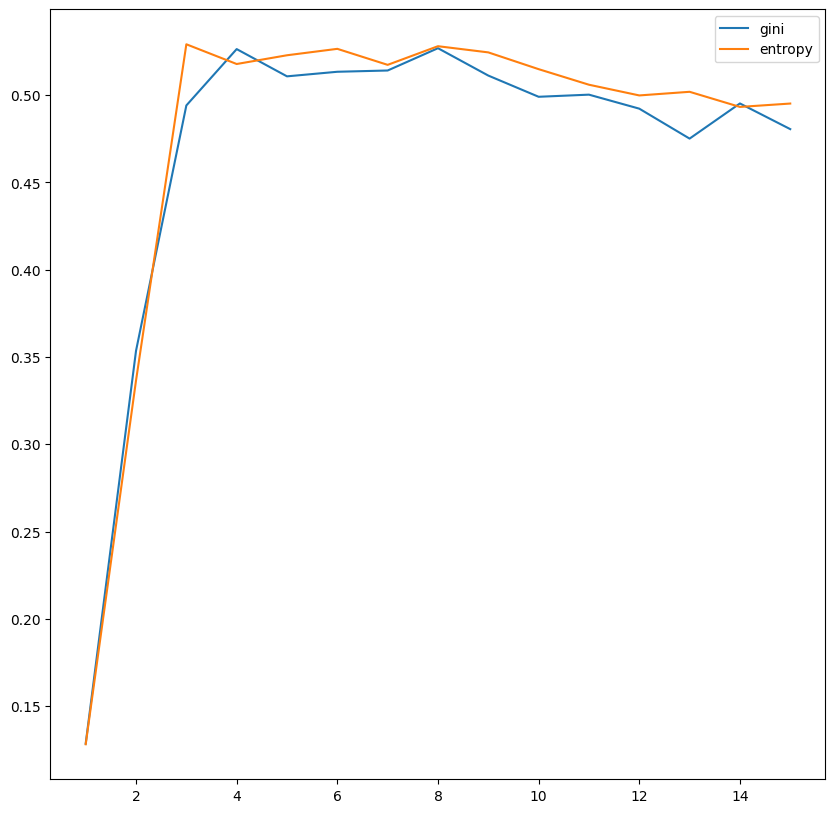

In [87]:
# “gini”, “entropy”, “log_loss”
crit = ['gini', 'entropy']
md = 15

scores = np.zeros((2, md))

for i in range(2):
    for n_nodes in range(1, md + 1):
        clf = DecisionTreeClassifier(max_depth=n_nodes, criterion=crit[i])
        score = cross_val_score(clf, X, y, scoring='f1_macro')
        scores[i][n_nodes - 1] = np.mean(score)

plt.subplots(figsize=[10, 10])
plt.plot([i for i in range(1, md + 1)], scores[0], label=crit[0])
plt.plot([i for i in range(1, md + 1)], scores[1], label=crit[1])
plt.legend()


Видно, что результаты слабо зависят от выбора критерия. Они показывают схожие результаты. Максимальная точность достигается при глубине от 4 до 8, далее идет снижение качества.

## Задание 4

In [78]:
#clf = GradientBoostingClassifier()
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [79]:
print('f1 score (train)', f1_score(y_train, clf.predict(X_train), average='micro'))
print('f1 score (test)', f1_score(y_test, clf.predict(X_test), average='micro'))


f1 score (train) 0.9982993197278912
f1 score (test) 0.8778659611992945


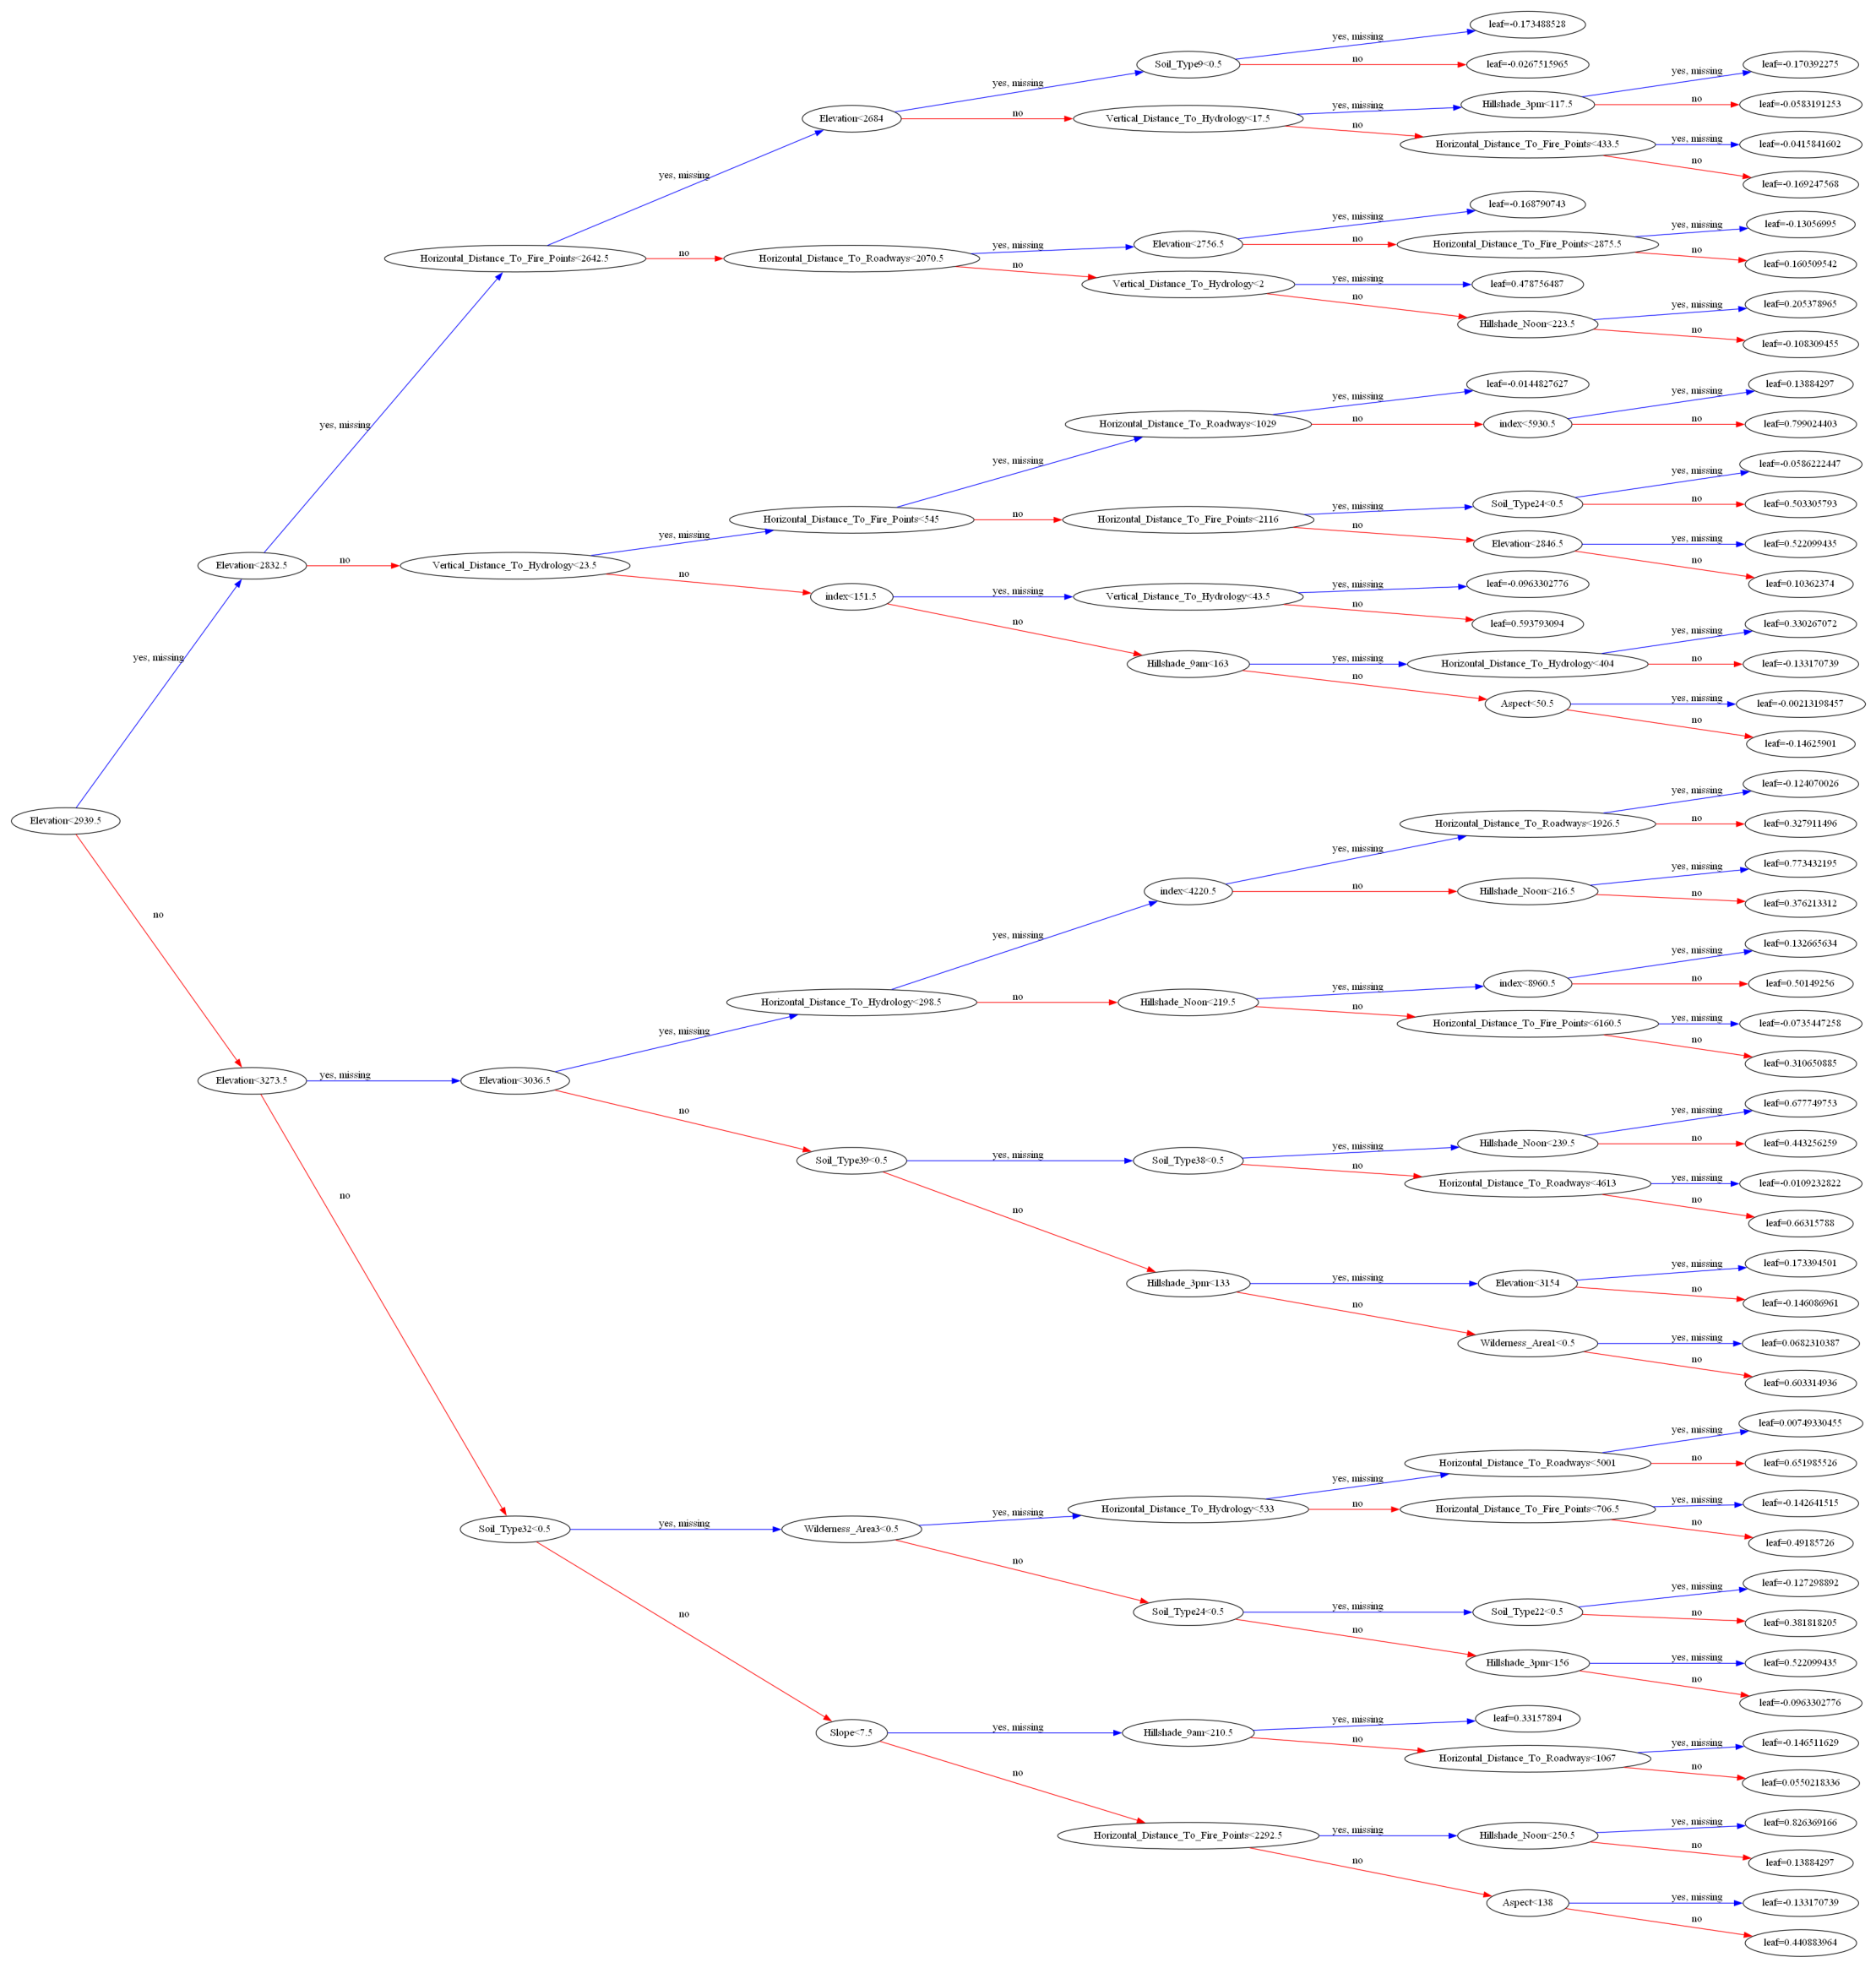

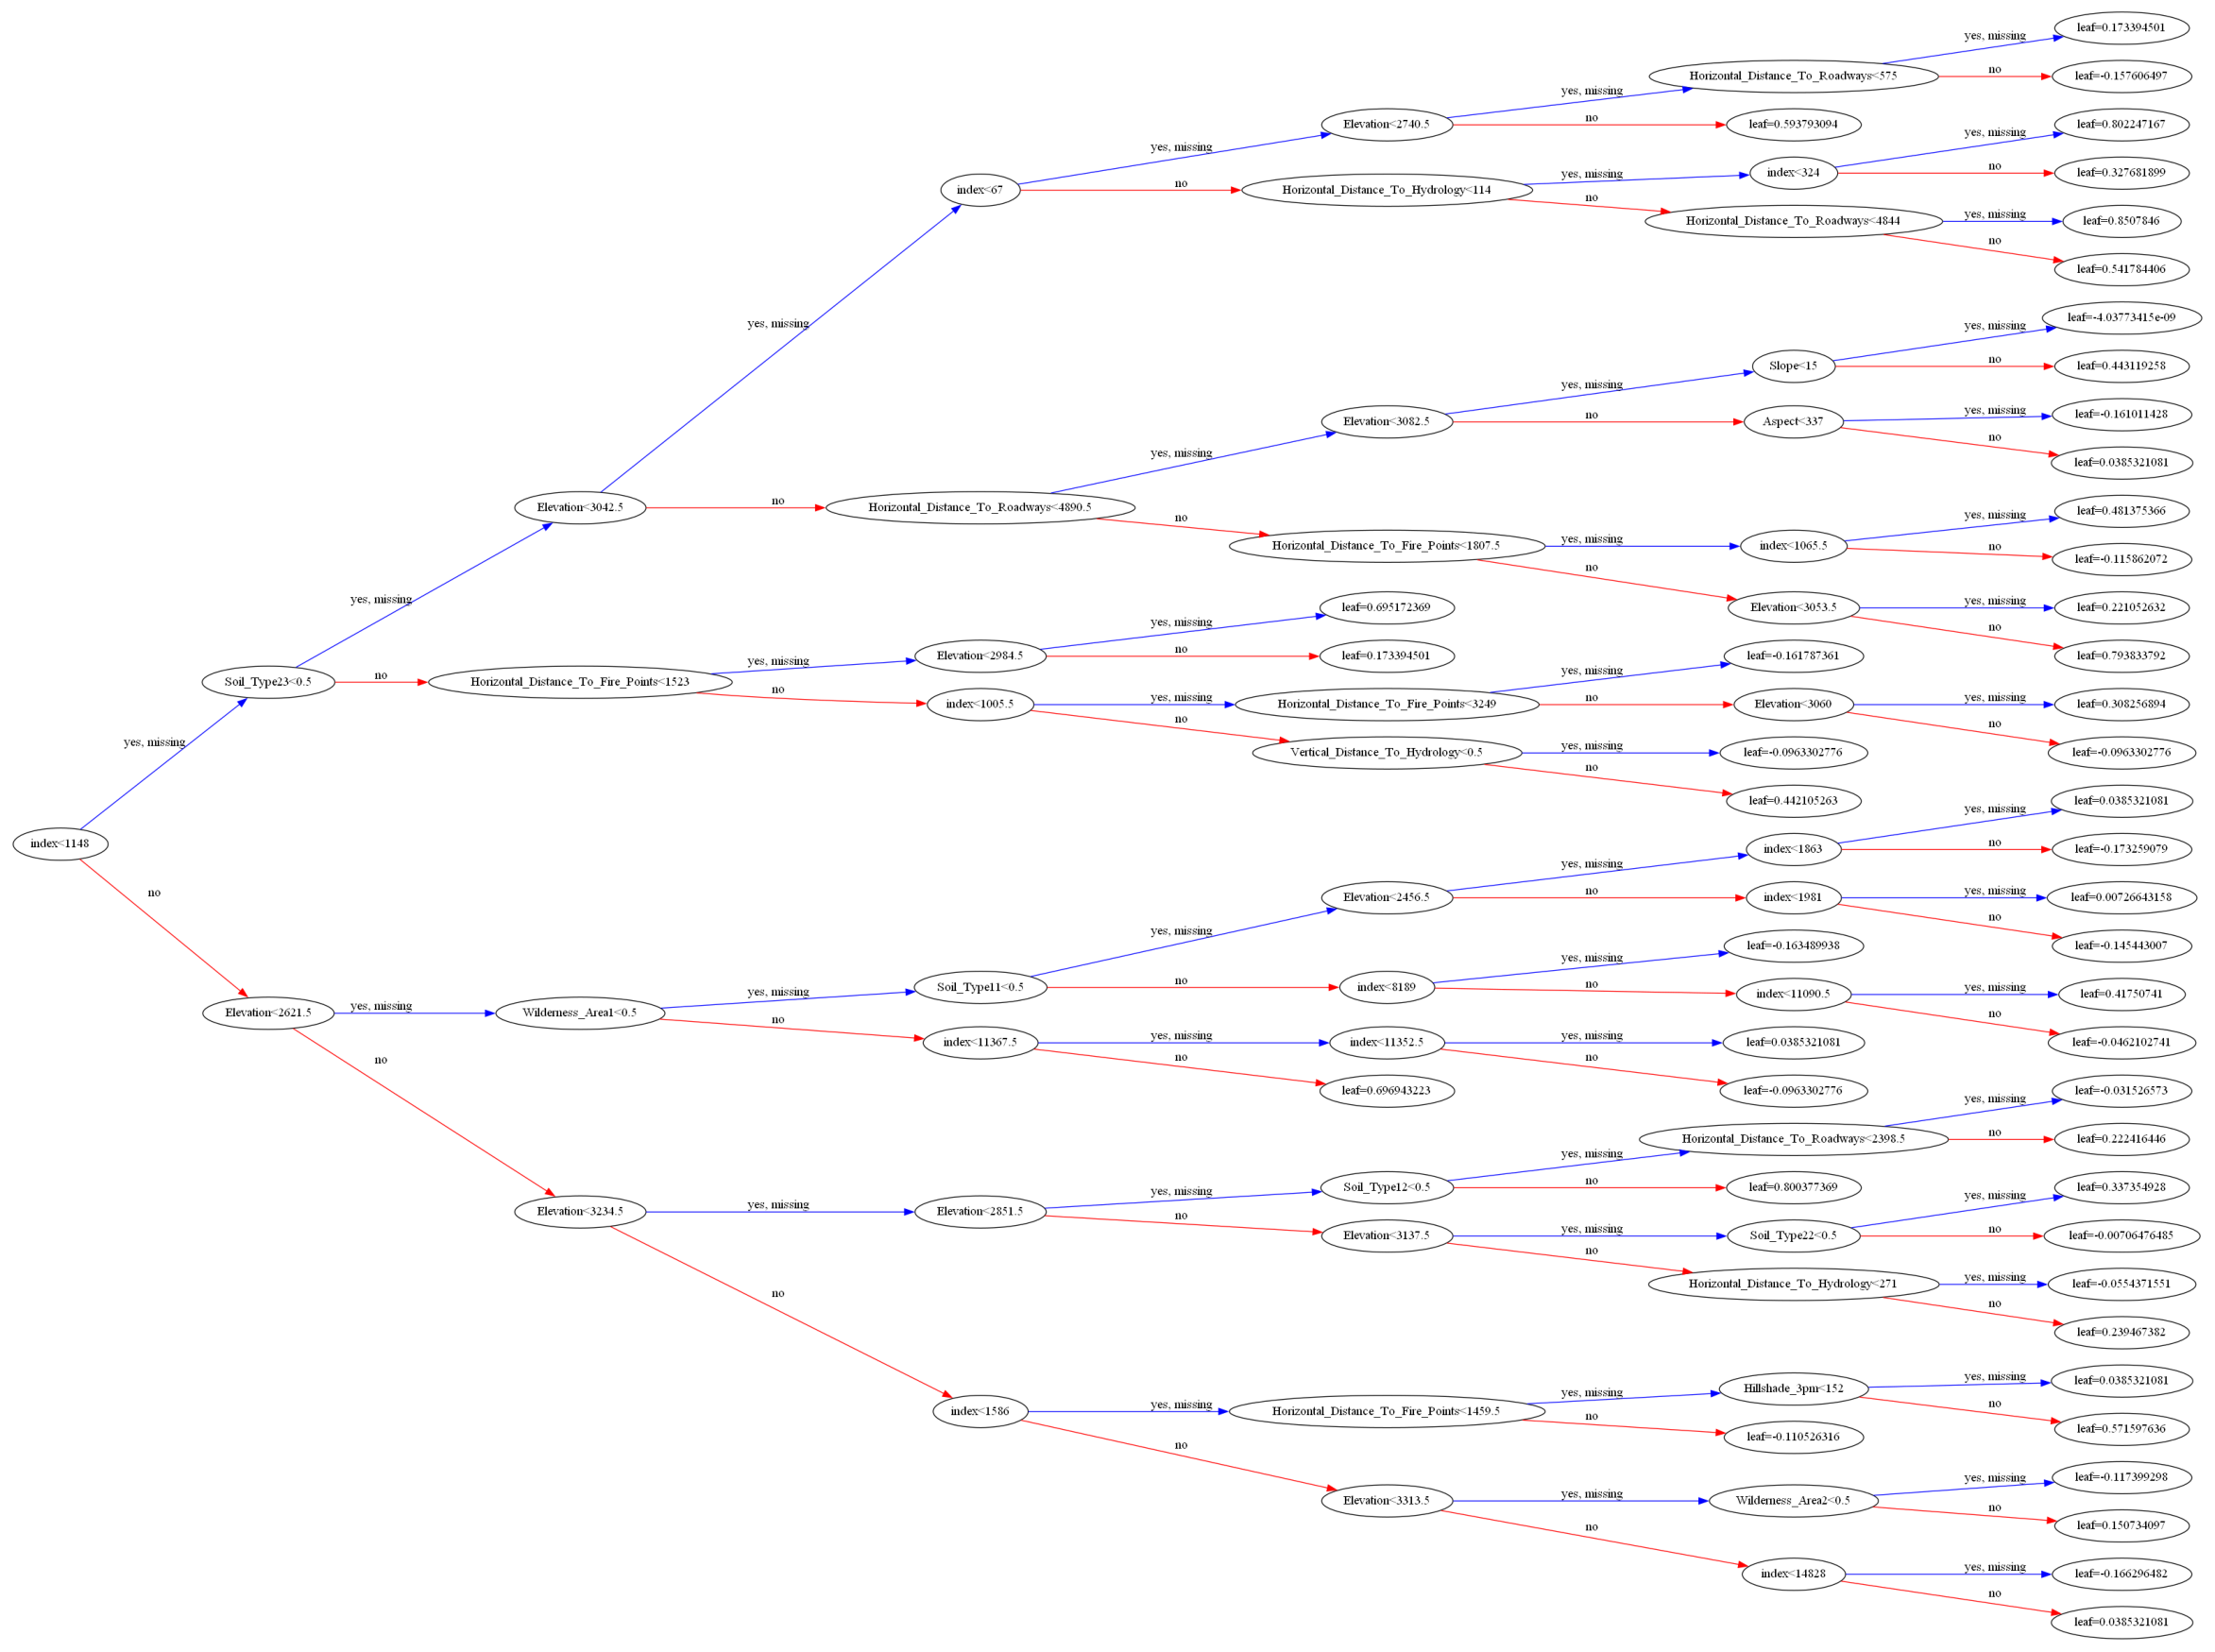

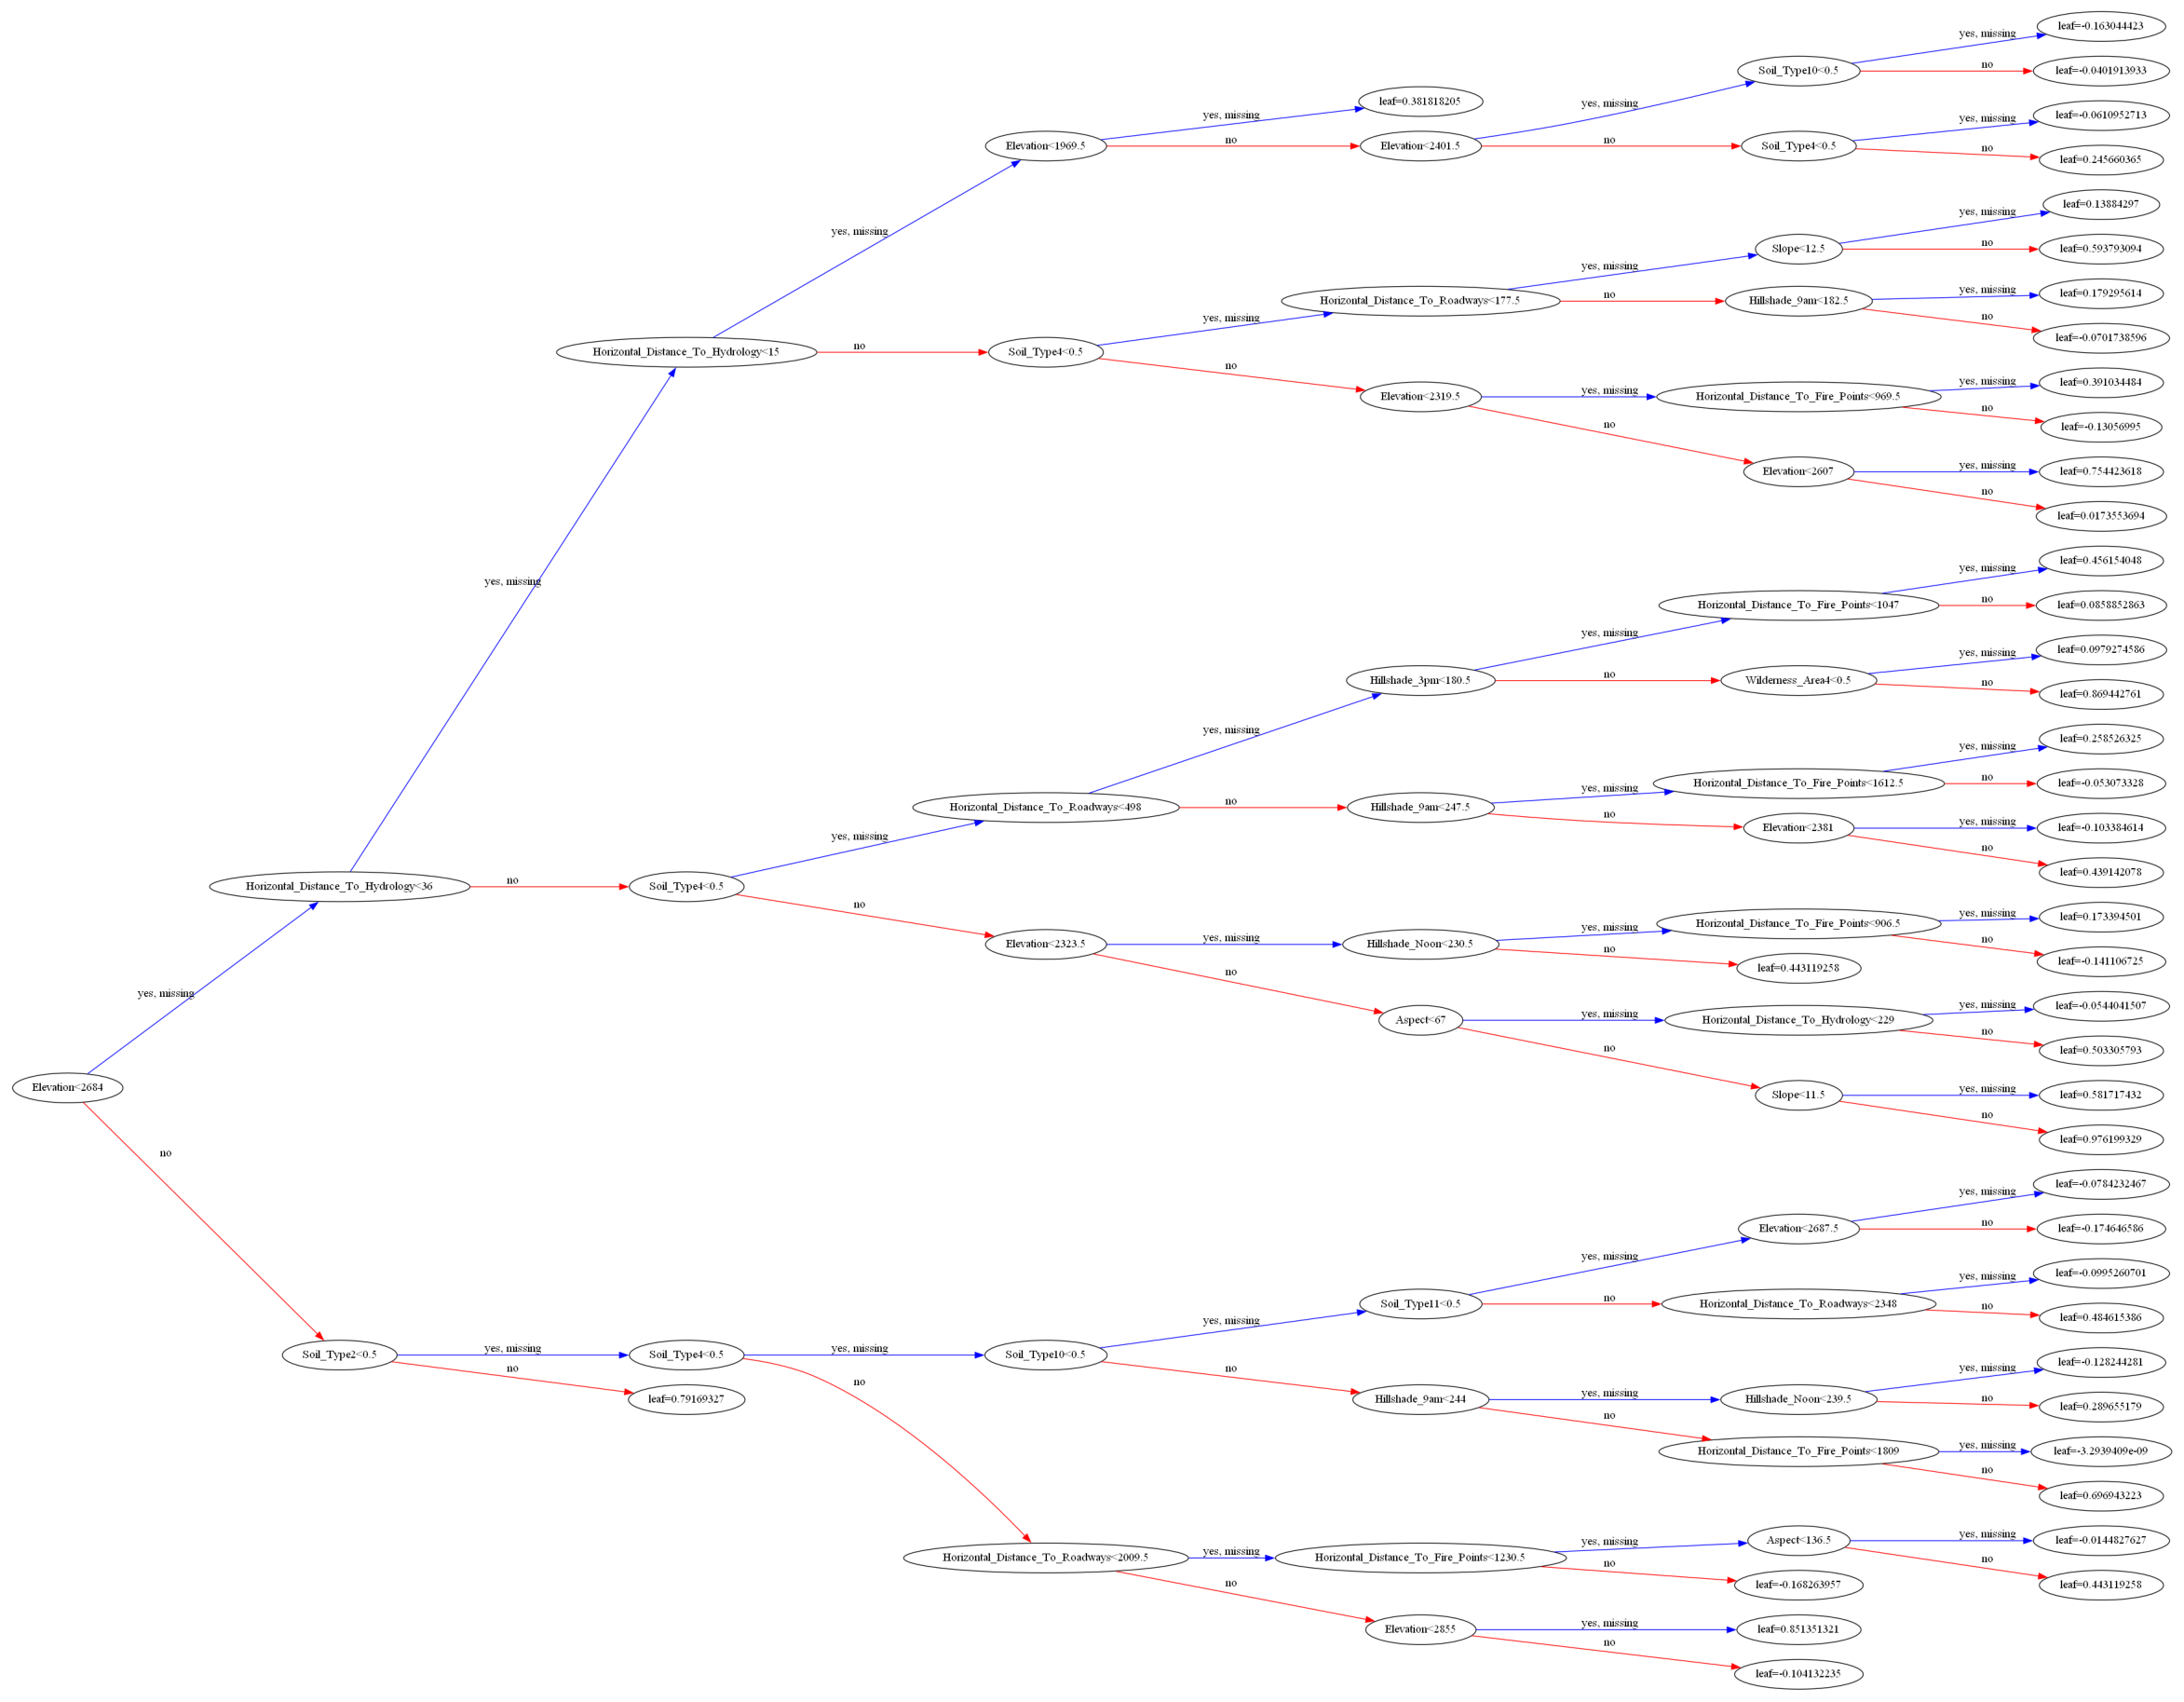

In [80]:
# from pydotplus import graph_from_dot_data
# #from IPython.display import Image
# for i in range(3):
#     dot_data = export_graphviz(
#         clf.estimators_[i, 0],
#         out_file=None, filled=True, rounded=True,
#         special_characters=True,
#         proportion=False, impurity=False,
#     )
#     plt.figure(figsize=(12,12))
#     graph = graph_from_dot_data(dot_data)
#     Image(graph.create_png())
#     plt.show()

for i in range(3):
    fig, ax = plt.subplots(figsize=(30, 30))
    xgb.plot_tree(clf, num_trees=i, ax=ax, rankdir='LR')
    plt.show()


In [81]:
imp_dict = dict()
feature_imp = clf.feature_importances_

for feature, imp in zip(X.columns, feature_imp):
    if imp != 0:
        imp_dict[feature] = imp

sorted_imp = sorted(imp_dict.items(), key=lambda kv: kv[1], reverse=True)

print('feature importances')

for num, (feature, imp) in enumerate(sorted_imp):
    print(feature, imp)


feature importances
Soil_Type30 0.08926587
Soil_Type10 0.0865403
Elevation 0.08507407
Wilderness_Area4 0.05963048
Soil_Type13 0.05076928
Soil_Type4 0.049176335
Soil_Type3 0.047444303
Soil_Type39 0.041213065
Soil_Type12 0.034537293
Soil_Type22 0.034295857
Wilderness_Area1 0.031952087
Soil_Type35 0.028898746
Wilderness_Area3 0.025709799
Soil_Type38 0.022128247
Soil_Type2 0.020002453
Soil_Type23 0.019796316
Soil_Type5 0.018970586
Soil_Type32 0.017439645
Horizontal_Distance_To_Hydrology 0.014550951
Wilderness_Area2 0.01382517
Soil_Type6 0.013645246
Soil_Type17 0.013632946
Soil_Type24 0.012463135
Soil_Type40 0.012253845
index 0.011311557
Hillshade_9am 0.01115039
Soil_Type33 0.009815424
Horizontal_Distance_To_Roadways 0.009733989
Soil_Type31 0.009594438
Horizontal_Distance_To_Fire_Points 0.009310663
Soil_Type1 0.00919371
Soil_Type29 0.008602374
Hillshade_Noon 0.008126533
Soil_Type20 0.007837161
Soil_Type11 0.007764474
Hillshade_3pm 0.0073139183
Aspect 0.0067074005
Vertical_Distance_To_Hydrol

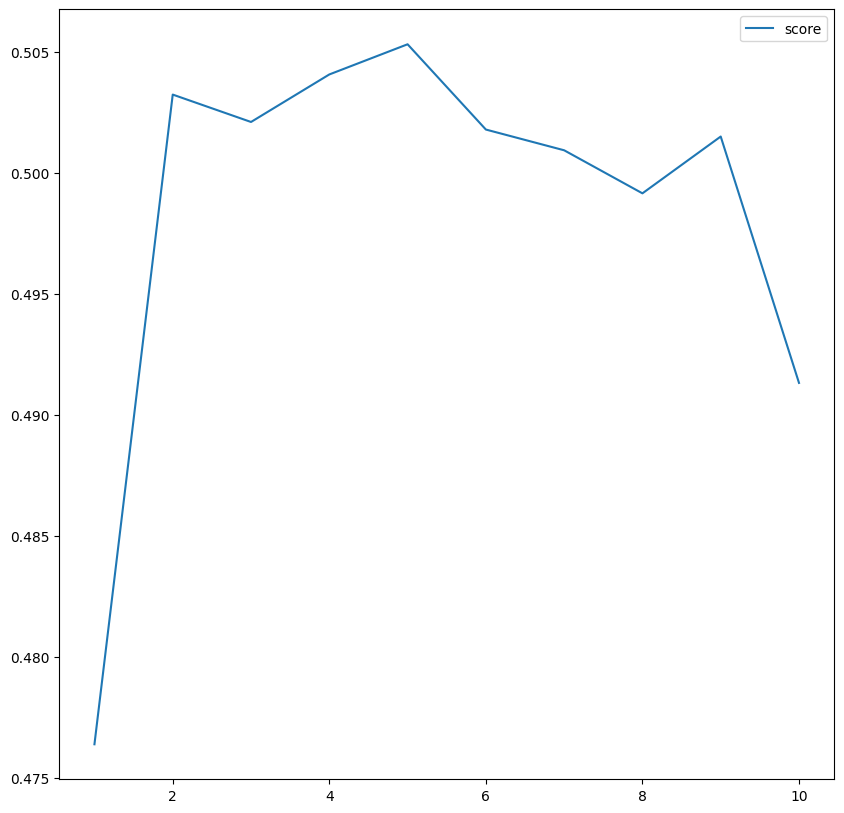

In [8]:
md = 10

scores = np.zeros(md)

for n_nodes in range(1, md + 1):
    clf = GradientBoostingClassifier(n_estimators=n_nodes, max_depth=7, learning_rate=0.2)
    score = cross_val_score(clf, X, y, scoring='f1_macro')
    scores[n_nodes - 1] = np.mean(score)

plt.subplots(figsize=[10, 10])
plt.plot([i for i in range(1, md + 1)], scores, label='score')
plt.legend()


Видно, что для градиентного бустинга оптимальным является 4 дерева, после чего идет ухудшение качества.

## Часть 5

In [83]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)


RandomForestClassifier()

In [84]:
print('f1 score (train)', f1_score(y_train, clf.predict(X_train), average='micro'))
print('f1 score (test)', f1_score(y_test, clf.predict(X_test), average='micro'))


f_1 score (train) 1.0
f_1 score (test) 0.8756613756613757


In [85]:
imp_dict = dict()
feature_imp = clf.feature_importances_

for feature, imp in zip(X.columns, feature_imp):
    if imp != 0:
        imp_dict[feature] = imp

sorted_imp = sorted(imp_dict.items(), key=lambda kv: kv[1], reverse=True)

print('feature importances')

for num, (feature, imp) in enumerate(sorted_imp):
    print(feature, imp)


feature importances
Elevation 0.1974583565832282
Horizontal_Distance_To_Roadways 0.0781711568981135
Id 0.07283918240616545
index 0.06940702305259971
Horizontal_Distance_To_Fire_Points 0.057111327225943184
Horizontal_Distance_To_Hydrology 0.05230086006563781
Wilderness_Area4 0.0464453648604688
Vertical_Distance_To_Hydrology 0.04631851768164043
Hillshade_9am 0.044179729590774305
Aspect 0.04088799281402324
Hillshade_3pm 0.037954098521526695
Hillshade_Noon 0.03628422493381761
Slope 0.029597071782050885
Soil_Type10 0.027664475558949547
Soil_Type39 0.01580687414679272
Soil_Type3 0.015314533648210973
Soil_Type38 0.01498330368812178
Wilderness_Area1 0.014878164830419703
Wilderness_Area3 0.013384120024657485
Soil_Type4 0.011219835100902697
Soil_Type30 0.008618068953924977
Soil_Type40 0.006990745756085573
Soil_Type2 0.005263605557337078
Soil_Type17 0.0052200528014006015
Soil_Type13 0.004936762687388151
Soil_Type23 0.004899846549279676
Soil_Type22 0.004775456577296134
Soil_Type32 0.00476267315143

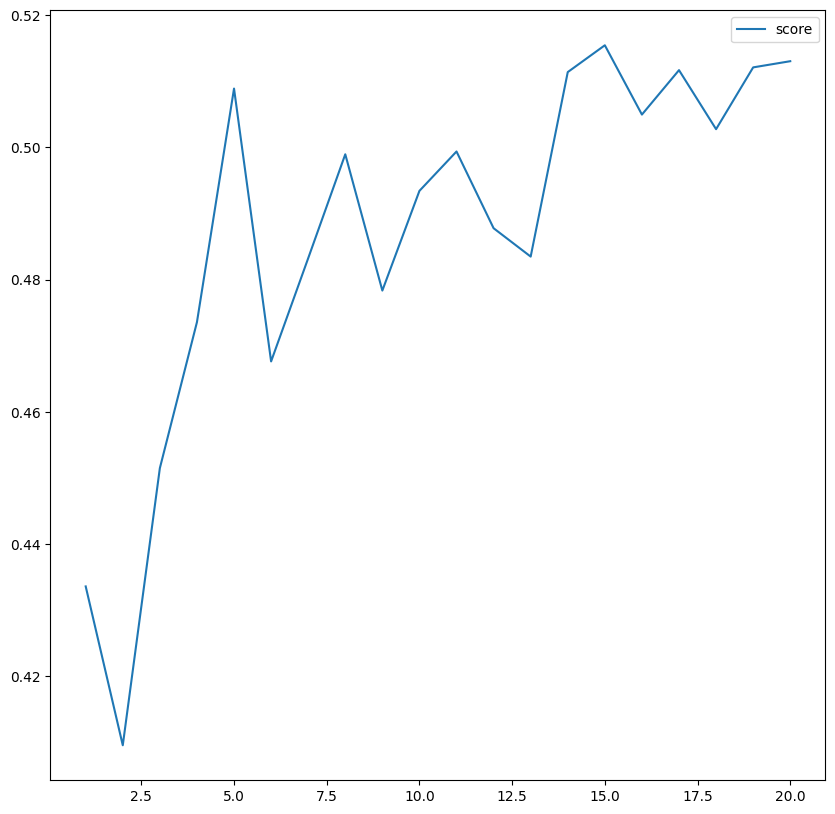

In [11]:
md = 20

scores = np.zeros(md)

for n_nodes in range(1, md + 1):
    clf = RandomForestClassifier(n_estimators=n_nodes)
    score = cross_val_score(clf, X, y, scoring='f1_macro')
    scores[n_nodes - 1] = np.mean(score)

plt.subplots(figsize=[10, 10])
plt.plot([i for i in range(1, md + 1)], scores, label='score')
plt.legend()


Видно, что для случайного леса не происходит снижения качества при увеличении количества деревьев.